# <font color = tomato>EDA - Basics

In [2]:
import pandas as pd
import os
# Set display option to show the full length of the column
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
# Determine the base directory based on the effective user ID
if os.geteuid() == 0:  # root user
    base_dir = '/root'
else:
    base_dir = '/home/sagemaker-user'

# Set the environment variable
os.environ['BASE_DIR'] = base_dir

# Verify the base directory
print(f"Base directory set to: {base_dir}")

Base directory set to: /root


---

### Step 1: Load Data and Basic Information

In [4]:
import pandas as pd

# Define the file path
# parsed_file_path = '/home/sagemaker-user/11.Data/01.BGL/03.Parsed_CFDR/parsed.csv'
parsed_file_path = '/root/11.Data/01.BGL/03.Parsed_CFDR/parsed.csv'

# Load the data into a DataFrame
df = pd.read_csv(parsed_file_path, sep=';')

# Display basic information about the DataFrame
print("Basic Information:")
print(df.info())

# Display the first few lines of the DataFrame
print("\nFirst few lines:")
df.head(10)

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4747963 entries, 0 to 4747962
Data columns (total 6 columns):
 #   Column      Dtype  
---  ------      -----  
 0   id          int64  
 1   event_type  int64  
 2   seq_id      object 
 3   time        float64
 4   label       object 
 5   eventlabel  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 217.3+ MB
None

First few lines:


,id,event_type,seq_id,time,label,eventlabel
0,1,189,R02-M1-N0-C:J12-U11,1.117813e+09,Anomaly,Normal
1,2,189,R02-M1-N0-C:J12-U11,1.117813e+09,Anomaly,Normal
2,3,189,R02-M1-N0-C:J12-U11,1.117813e+09,Anomaly,Normal
3,4,189,R02-M1-N0-C:J12-U11,1.117813e+09,Anomaly,Normal
4,5,189,R02-M1-N0-C:J12-U11,1.117813e+09,Anomaly,Normal
5,6,189,R02-M1-N0-C:J12-U11,1.117813e+09,Anomaly,Normal
6,7,189,R02-M1-N0-C:J12-U11,1.117813e+09,Anomaly,Normal
7,8,189,R02-M1-N0-C:J12-U11,1.117813e+09,Anomaly,Normal
8,9,189,R02-M1-N0-C:J12-U11,1.117813e+09,Anomaly,Normal
9,10,189,R02-M1-N0-C:J12-U11,1.117813e+09,Anomaly,Normal


### Step 2: Summary Statistics

In [5]:
# Summary statistics of the DataFrame
print("\nSummary Statistics:")
df.describe(include='all')


Summary Statistics:


,id,event_type,seq_id,time,label,eventlabel
count,4.747963e+06,4.747963e+06,4658667,4.747963e+06,4747963,4747963
unique,NaN,NaN,69251,NaN,2,44
top,NaN,NaN,R30-M0-N9-C:J16-U01,NaN,Anomaly,Normal
freq,NaN,NaN,152329,NaN,3287332,4399265
mean,2.373982e+06,1.271027e+02,NaN,1.123975e+09,NaN,NaN
std,1.370619e+06,8.594136e+01,NaN,5.226260e+06,NaN,NaN
min,1.000000e+00,1.000000e+00,NaN,1.117813e+09,NaN,NaN
25%,1.186992e+06,3.800000e+01,NaN,1.120121e+09,NaN,NaN
50%,2.373982e+06,1.680000e+02,NaN,1.121574e+09,NaN,NaN
75%,3.560972e+06,1.680000e+02,NaN,1.128723e+09,NaN,NaN


### Step 3: Checking for Missing Values

In [6]:
# Checking for missing values
print("\nMissing Values:")
df.isnull().sum()


Missing Values:


id                0
event_type        0
seq_id        89296
time              0
label             0
eventlabel        0
dtype: int64

### Step 4: Distribution of Event Types

In [8]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Set the pastel palette
# sns.set_palette("pastel")

# # Distribution of event types
# plt.figure(figsize=(12, 6))
# sns.countplot(x='event_type', data=df)
# plt.title('Distribution of Event Types')
# plt.xlabel('Event Type')
# plt.ylabel('Count')
# plt.xticks(rotation=90)
# plt.show()

#### <font color = orange> 4.1 Top 10 Events Only

/tmp/ipykernel_383/1473736596.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=top_event_types.index, y=top_event_types.values, palette="pastel", order=top_event_types.index)
/tmp/ipykernel_383/1473736596.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  bars.set_xticklabels([f'Seq: {et}' for et in top_event_types.index])


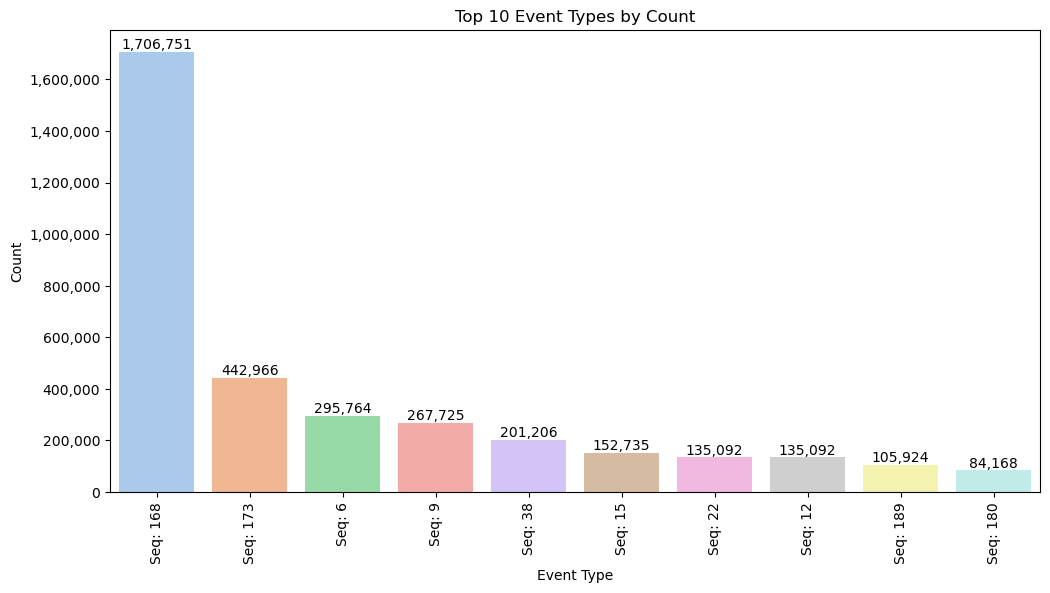

,Event Type,Template
0,168,generating <*>
1,173,iar <*> dear <*>
2,6,<*> double-hummer alignment exceptions
3,9,<*> floating point alignment exceptions
4,38,CE sym <*> at <*> mask <*>
5,15,<*> TLB error interrupt
6,22,"<*> total interrupts. <*> critical input interrupts. <*> microseconds total spent on critical input interrupts, <*> microseconds max time in a critical input interrupt."
7,12,<*> microseconds spent in the rbs signal handler during <*> calls. <*> microseconds was the maximum time for a single instance of a correctable ddr.
8,189,instruction cache parity error corrected
9,180,"idoproxydb hit ASSERT condition: ASSERT expression=<*> Source file=<*> Source line=<*> Function=<*> IdoTransportMgr::SendPacket(IdoUdpMgr<*>, BglCtlPavTrace<*>)"


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

# Load the data into a DataFrame
parsed_file_path = '/root/11.Data/01.BGL/03.Parsed_CFDR/parsed.csv'
df = pd.read_csv(parsed_file_path, sep=';')

# Get the top 10 event types
top_event_types = df['event_type'].value_counts().head(10).sort_values(ascending=False)

# Set the pastel palette
sns.set_palette("pastel")

# Plot the top 10 event types by count
plt.figure(figsize=(12, 6))
bars = sns.barplot(x=top_event_types.index, y=top_event_types.values, palette="pastel", order=top_event_types.index)
plt.title('Top 10 Event Types by Count')
plt.xlabel('Event Type')
plt.ylabel('Count')

# Add text labels on the bars
for bar, count in zip(bars.patches, top_event_types.values):
    height = bar.get_height()
    bars.text(bar.get_x() + bar.get_width() / 2, height, f'{count:,}', ha='center', va='bottom')

# Customize the x-axis labels
bars.set_xticklabels([f'Seq: {et}' for et in top_event_types.index])
plt.xticks(rotation=90)

# Format Y axis with comma formatting
bars.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

plt.show()

# Load the template data
base_dir = '/root'
# template_file_path = os.path.join(base_dir, '12.Templates/aecit_BGL_templates.csv')
template_file_path = os.path.join(base_dir, '08.GIT_Repos_REF/11.Examples_Baseline_AECID/templates/BGL_templates.csv')
with open(template_file_path, 'r') as file:
    templates = [line.strip() for line in file]

# Create a table of the top event types and their corresponding templates
template_table = pd.DataFrame({
    'Event Type': top_event_types.index,
    'Template': [templates[et - 1] for et in top_event_types.index]
})

# Display the table with text left-aligned
import IPython.display as display
display.display(template_table.style.set_properties(**{'text-align': 'left'}).set_table_styles([dict(selector='th', props=[('text-align', 'left')])]))

---

### Step 5: Distribution of Labels

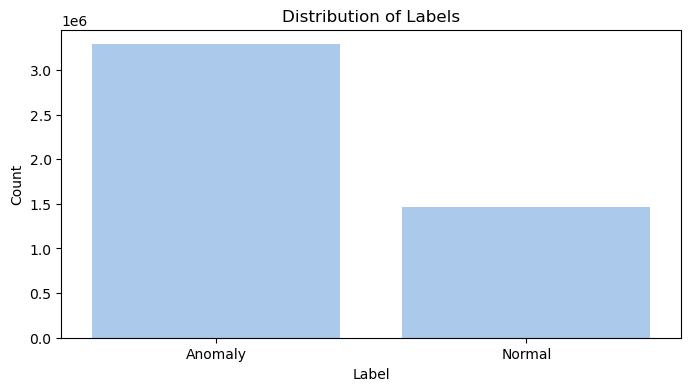

In [9]:
# Distribution of labels
plt.figure(figsize=(8, 4))
sns.countplot(x='label', data=df)
plt.title('Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

### Step 6: Time Analysis

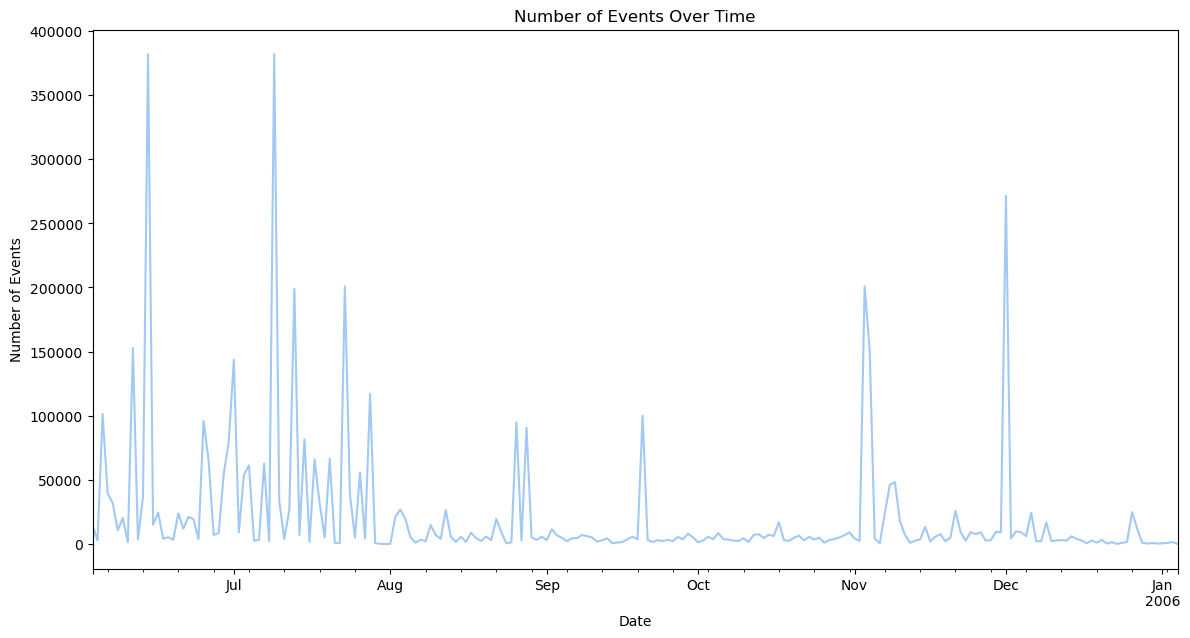

In [10]:
# Convert the time column to datetime
df['datetime'] = pd.to_datetime(df['time'], unit='s')

# Plot the number of events over time
plt.figure(figsize=(14, 7))
df.set_index('datetime')['id'].resample('D').count().plot()
plt.title('Number of Events Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Events')
plt.show()

### Step 7: Event Types Over Time

In [12]:
# # Plot the number of events for each event type over time
# plt.figure(figsize=(14, 7))
# sns.lineplot(data=df.set_index('datetime').groupby('event_type').resample('D').size().unstack().fillna(0))
# plt.title('Event Types Over Time')
# plt.xlabel('Date')
# plt.ylabel('Number of Events')
# plt.legend(title='Event Type', bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.show()

### Step 8: Correlation Analysis

In [13]:
# # Correlation matrix
# correlation_matrix = df.corr()

# # Plot the heatmap
# plt.figure(figsize=(10, 8))
# sns.heatmap(correlation_matrix, annot=True, cmap='pastel', fmt='.2f')
# plt.title('Correlation Matrix')
# plt.show()

### Step 9: Label Distribution Across Event Types

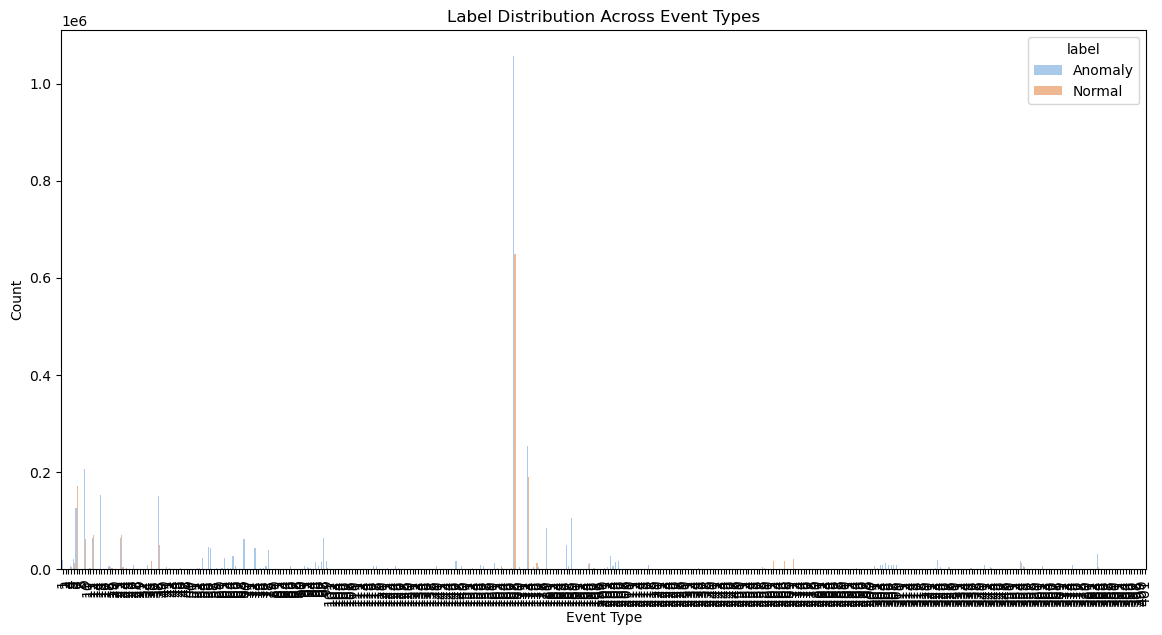

In [14]:
# # Label distribution across event types
# plt.figure(figsize=(14, 7))
# sns.countplot(x='event_type', hue='label', data=df)
# plt.title('Label Distribution Across Event Types')
# plt.xlabel('Event Type')
# plt.ylabel('Count')
# plt.xticks(rotation=90)
# plt.show()

/tmp/ipykernel_383/2589266272.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  bars.set_xticklabels([f'Seq: {et}' for et in top_event_types])


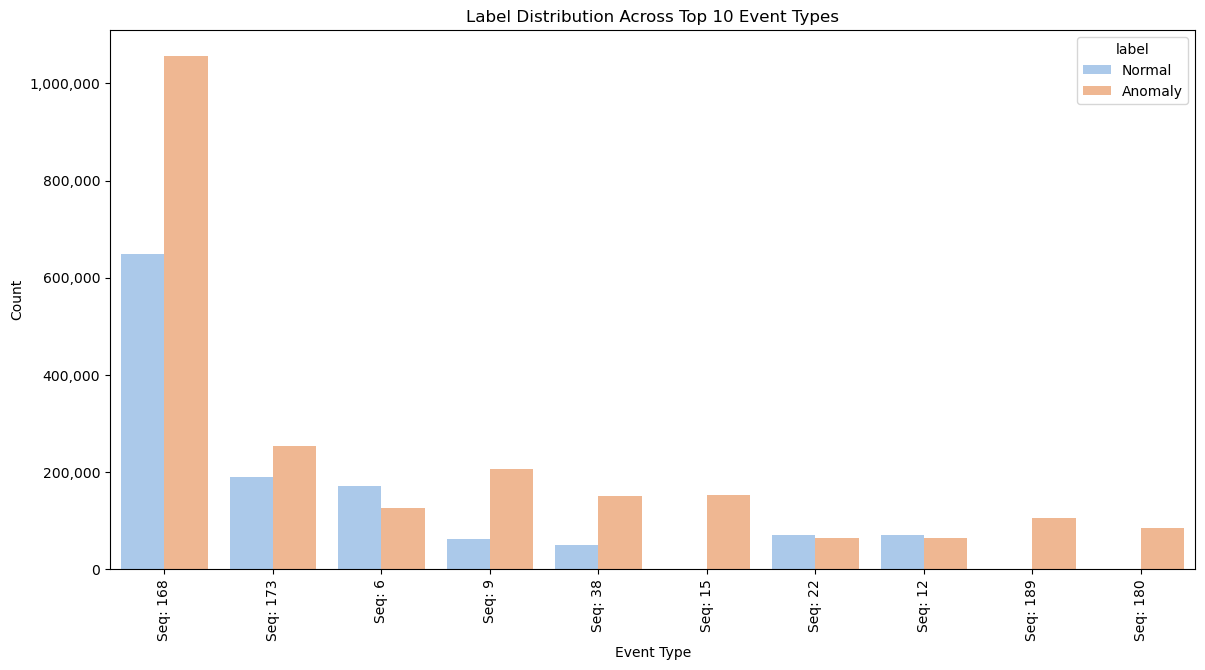

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

# Load the data into a DataFrame
parsed_file_path = '/root/11.Data/01.BGL/03.Parsed_CFDR/parsed.csv'
df = pd.read_csv(parsed_file_path, sep=';')

# Get the top 10 event types
top_event_types = df['event_type'].value_counts().head(10).sort_values(ascending=False).index

# Filter the DataFrame to include only the top 10 event types
df_top_10 = df[df['event_type'].isin(top_event_types)]

# Set the pastel palette
sns.set_palette("pastel")

# Plot the label distribution across the top 10 event types
plt.figure(figsize=(14, 7))
bars = sns.countplot(x='event_type', hue='label', data=df_top_10, palette="pastel", order=top_event_types)
plt.title('Label Distribution Across Top 10 Event Types')
plt.xlabel('Event Type')
plt.ylabel('Count')

# Customize the x-axis labels
bars.set_xticklabels([f'Seq: {et}' for et in top_event_types])
plt.xticks(rotation=90)

# Format Y axis with comma formatting
bars.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

plt.show()

/tmp/ipykernel_383/2230431110.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  bars.set_xticklabels([f'Seq: {et}' for et in top_event_types])


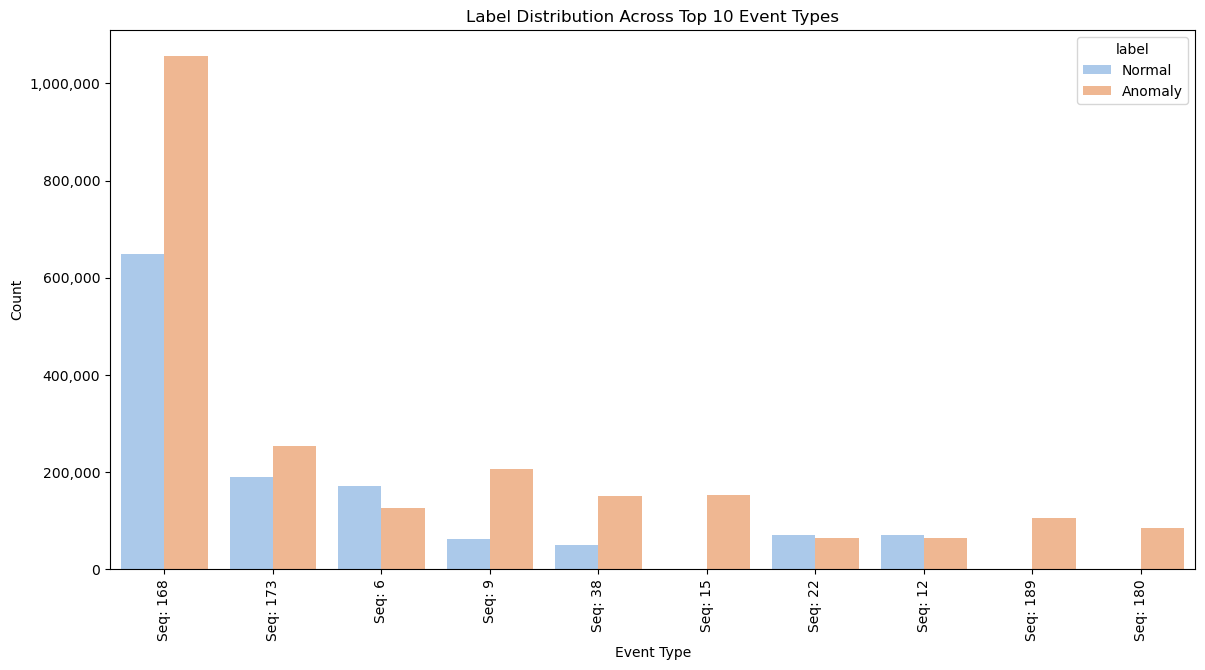

,Event Type,Template
0,168,generating <*>
1,173,iar <*> dear <*>
2,6,<*> double-hummer alignment exceptions
3,9,<*> floating point alignment exceptions
4,38,CE sym <*> at <*> mask <*>
5,15,<*> TLB error interrupt
6,22,"<*> total interrupts. <*> critical input interrupts. <*> microseconds total spent on critical input interrupts, <*> microseconds max time in a critical input interrupt."
7,12,<*> microseconds spent in the rbs signal handler during <*> calls. <*> microseconds was the maximum time for a single instance of a correctable ddr.
8,189,instruction cache parity error corrected
9,180,"idoproxydb hit ASSERT condition: ASSERT expression=<*> Source file=<*> Source line=<*> Function=<*> IdoTransportMgr::SendPacket(IdoUdpMgr<*>, BglCtlPavTrace<*>)"


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

# Load the data into a DataFrame
parsed_file_path = '/root/11.Data/01.BGL/03.Parsed_CFDR/parsed.csv'
df = pd.read_csv(parsed_file_path, sep=';')

# Get the top 10 event types
top_event_types = df['event_type'].value_counts().head(10).sort_values(ascending=False).index

# Filter the DataFrame to include only the top 10 event types
df_top_10 = df[df['event_type'].isin(top_event_types)]

# Set the pastel palette
sns.set_palette("pastel")

# Plot the label distribution across the top 10 event types
plt.figure(figsize=(14, 7))
bars = sns.countplot(x='event_type', hue='label', data=df_top_10, palette="pastel", order=top_event_types)
plt.title('Label Distribution Across Top 10 Event Types')
plt.xlabel('Event Type')
plt.ylabel('Count')

# Customize the x-axis labels
bars.set_xticklabels([f'Seq: {et}' for et in top_event_types])
plt.xticks(rotation=90)

# Format Y axis with comma formatting
bars.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

plt.show()

# Load the template data
base_dir = '/root'
# template_file_path = os.path.join(base_dir, '12.Templates/aecit_BGL_templates.csv')
template_file_path = os.path.join(base_dir, '08.GIT_Repos_REF/11.Examples_Baseline_AECID/templates/BGL_templates.csv')

with open(template_file_path, 'r') as file:
    templates = [line.strip() for line in file]

# Create a table of the top event types and their corresponding templates
template_table = pd.DataFrame({
    'Event Type': top_event_types,
    'Template': [templates[et - 1] for et in top_event_types]
})

# Display the table with text left-aligned
import IPython.display as display
display.display(template_table.style.set_properties(**{'text-align': 'left'}).set_table_styles([dict(selector='th', props=[('text-align', 'left')])]))


### Step 10: Sequence ID Analysis

In [17]:
# # Top 10 sequence IDs by event count
# top_seq_ids = df['seq_id'].value_counts().head(10)

# # Plot the top 10 sequence IDs
# plt.figure(figsize=(12, 6))
# sns.barplot(x=top_seq_ids.index, y=top_seq_ids.values, palette='pastel')
# plt.title('Top 10 Sequence IDs by Event Count')
# plt.xlabel('Sequence ID')
# plt.ylabel('Count')
# plt.xticks(rotation=90)
# plt.show()